아래 강의 노트는 [Python for data Analysis 책](https://github.com/wesm/pydata-book)4장을 기반으로 번역 및 편집하여 페이지 구성함  
<img src ="https://image.yes24.com/goods/73268296/800x0" width=5%>

 **무단 배포를 금지 합니다.** 

***

## NumPy 기본: 배열과 벡터 연산

####  Numpy 에서 제공하는 것
* 효율적인 다차원 배열인 ndarray는 빠른 배열 계산과 유연한 브로드캐스팅 기능 제공
* 반복문을 작성할 필요 없이 전체 데이터 배열을 빠르게 계산 할 수 있는 표준 수학함수
* 배열 데이터를 디스크에 쓰거나 읽을 수 있는 도구와 메모리에 적재된 파일을 다루는 도구
* 선형대수, 난수 생성기, 푸리에 변환 기능
* C,C++,포트란으로 작성한 코드를 연결할 수 있는 C API  
    
#### 데이터 분석 에서 중요하게 생각하는 기능
* 벡터 배열 상에서 데이터 가공, 정제 , 부분집합, 필터링 변형 그리고 다른 여러 종류의 연산을 빠르게 수행
* 정렬, 유일 원소 찾기, 집한 연산 같은 일방적인 배열 처리 알고리즘
* 통계의 효과적인 표현과 데이터를 수집 요약하기
* 다양한 종류의 데이터를 병합하고 통합 위한 데이터 정렬과 데이터 간의 관계 조직
* 내부에서 if -elif- else를 사용하는 반복문 대신 사용할 수 있는 조건 표현을 허용하는 배열 처리
* 데이터 묶음 전체에 적용할 수 있는 수집, 변형 , 함수 적용 같은 데이터 처리

In [1]:
import numpy as np  # @@ 리스트보다 실행 속도가 빠르다!

In [2]:
import numpy as np

my_arr = np.arange(1000000)  # @@@ 0부터 1000000개의 데이터를 배열로 만드는 함수
my_list = list(range(1000000))  # @@ 0부터 n개의 데이터를 리스트로 저장함

Numpy 배열과 파이썬의 리스트의  성능 차이 비교

In [3]:
%time for _ in range(10): my_arr2 = my_arr * 2  # @@ 해당 연산에 걸리는 시간 출력
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 26.9 ms
Wall time: 1.33 s


Numpy를 사용한 코드 순수한 파이썬으로 작성한 코드보다 
   > 속도 : 열배 ~ 백배 빠름    
   > 메모리 적게사용

## The NumPy ndarray: 다차원 배열

ndarray라고 하는 N 배열 객체   
대규모의 집합을 담을 수 있고 빠르고 유연한 자료구조

In [4]:
import numpy as np
np.random.seed(1)  # @@ 시간이 지나도 숫자가 똑같음
np.random.randn(2, 3)

array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ]])

In [5]:
import numpy as np
np.random.seed(10)  # @@ 시간이 지남에도 일정하게 숫자 설정하기 위해
# Generate some random data
data = np.round(np.random.randn(2, 3))*10  # @@ 2행 3열, 반올림한 결과에 10을 곱함
data

array([[ 10.,  10., -20.],
       [ -0.,  10., -10.]])

#### 산술연산

In [6]:
data * 10

array([[ 100.,  100., -200.],
       [  -0.,  100., -100.]])

In [7]:
data + data

array([[ 20.,  20., -40.],
       [ -0.,  20., -20.]])

<img src="https://laboputer.github.io/assets/img/ml/python/numpy/1.JPG">


* ndarray는 모두 **같은** 자료 구조형    
* ```shape``` : 튜플과 배열에 저장된 각 차원의 크기 
* ```dtype``` : 튜플과 배열에 저장된 자료형 
* ```ndim``` : 배열의 차원수 

In [8]:
data

array([[ 10.,  10., -20.],
       [ -0.,  10., -10.]])

In [9]:
data.shape  # 몇면 몇행 몇열인지 알려줌

(2, 3)

In [10]:
data.ndim  # 차원을 알려줌(면행열:3, 면면행열:4 ... )

2

### ndarrays 생성하기

배열을 생성하는 가장 쉬운 방법은 ```array``` 함수 이용     
예: 파이썬의 리스트는 변환하기 좋은 예

In [11]:
data1 = [6, 8.2, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 8.2, 0. , 1. ])

In [12]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [13]:
arr2.ndim

2

In [14]:
arr2.shape

(2, 4)

In [15]:
arr1.dtype

dtype('float64')

In [16]:
arr2.dtype

dtype('int32')

특수한 배열 만들기     
* ```zeros()```: () 사이즈 만큼 0으로 채워진 배열 생성
* ```ones()```:() 사이즈 만큼 1으로 채워진 배열 생성
* ```empty()```:() 사이즈 만큼 빈 배열 생성  

In [17]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [19]:
np.empty((2, 3, 2))

array([[[1.10734569e-311, 2.47032823e-322],
        [0.00000000e+000, 0.00000000e+000],
        [1.82713057e+011, 2.46567317e+179]],

       [[4.71080837e-090, 4.27629914e-033],
        [2.36594434e+179, 1.79699205e-052],
        [3.99910963e+252, 1.46030983e-319]]])

In [20]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

###  ndarrays의 데이터 타입

* ```dtype```은 ndarray가 메모리에 있는 특정 데이터를 설명하기 위해 필요한 정보를 담고 있는 특수한 객체

* ```astype```을 이용하여 배열의 ```dtype```을 다른 형식으로 변환 가능 

In [21]:
arr1 = np.array([1, 2, 3], dtype=np.float64)  # @@ 만들때 dtype으로 변경
print(arr1.dtype)
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr2.dtype

float64


dtype('int32')

In [22]:
arr2.dtype

dtype('int32')

In [23]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int32')

정수형을 부동소수점으로 변환 

In [24]:
float_arr = arr.astype(np.float64)  # @@ 받을때 astype으로 변경
float_arr.dtype

dtype('float64')

부동소수정수를 정수형 dtype으로 변환하면 소수점 아래 자리는 버려짐

In [25]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1]) 
arr
arr.astype(np.int32)  # @@ 내림으로 변경된다!! 소수점 사라짐

array([ 3, -1, -2,  0, 12, 10])

In [26]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
#numeric_strings.astype(float)
numeric_strings

array([b'1.25', b'-9.6', b'42'], dtype='|S4')

In [27]:
int_array = np.arange(10) # 0 ~ 9 int64
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64) #float64
int_array.astype(calibers.dtype)  # @@ c의 타입으로 바꿨으니까 float로 바뀜

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [28]:
empty_uint32 = np.empty(8, dtype='u4') # @@ u4타입 = unsigned int
empty_uint32

array([    0,     1,     0,     0,  1148,     0,   768, 32764],
      dtype=uint32)

```astype```을 호출 하면 새로운 ```dtype```과 동일해도 항상 새로운 배열을 생성 (데이터복사)

###  NumPy 산술연산

**벡터화** :배열의 중요한 특징은 ```for```을 사용하지 않고도 데이터를 일괄 처리 가능 

In [29]:
import numpy as np
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [30]:
arr=arr * arr  # @@ * 연산자는 원소 곱
arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [31]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [32]:
1 / arr

array([[1.        , 0.25      , 0.11111111],
       [0.0625    , 0.04      , 0.02777778]])

In [33]:
arr ** 0.5

array([[1., 2., 3.],
       [4., 5., 6.]])

In [34]:
arr2 = np.array([[0., 4., 1.], [1000, 2., 12.]])
arr2


array([[   0.,    4.,    1.],
       [1000.,    2.,   12.]])

In [35]:
arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [36]:
arr2 > arr

array([[False, False, False],
       [ True, False, False]])

###  색인과 슬라이싱

인덱스는 파이썬의 리스트 인덱싱과 유사하게 동작

In [37]:
arr = np.arange(10) #0~9
print(arr)
print(arr[5])
print(arr[5:8])
arr[5:8] = 12  # @@ 5~7 인덱스의 값을 12로 바꾼다(넘파이는 각각을 12로, 리스트는 통째로 12로)
print(arr)

#lst = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#lst[5:8] = [12]  # @@ 리스트는 정수로 넣으면 안되고 리스트로 넣어야되네 저 3개를 12로 묶어줌
#print(lst)

[0 1 2 3 4 5 6 7 8 9]
5
[5 6 7]
[ 0  1  2  3  4 12 12 12  8  9]


In [38]:
arr_slice = arr[5:8]

print(arr_slice)

# @@ arr[행:행, 열:열]

[12 12 12]


In [39]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [40]:
arr_slice[1] = 12345  # @@ arr_slice가 arr를 참조하는 형태라서 arr도 바뀜
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [41]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

![array](./fig4_1.png)

In [42]:
import numpy as np
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [43]:
arr2d[0,2] # @@ [행,열]

3

In [44]:
arr2d[0][2]  # @@ [행][열]

3

In [45]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9],[10,11,12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

numpy ```copy()``` 참고

https://numpy.org/doc/stable/reference/generated/numpy.copy.html

In [46]:
old_values = arr3d[0]#.copy()  # @@ a = b[]는 b의 주소를 참조하는 것, 따라서 b가 변하면 a도 변함
arr3d[0]=42  # @@ a = b[].copy()는 새로운 공간을 만드는 것, 따라서 b가 변해도 a는 안변함

arr3d[0]=old_values
arr3d
#old_values

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [47]:
arr3d[1, 0,2]  # @@ 1면 0행 2열의 값

9

In [48]:
x = arr3d[1]  # @@ 1면
x  # @@ 1면
x[0]  # @@ 1면의 0행

array([7, 8, 9])

#### 슬라이스로 선택하기

![img](./fig4_2.png)

In [49]:
arr
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [50]:
arr2d
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [51]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [52]:
arr2d[1, :2]

array([4, 5])

In [53]:
arr2d[:2, 2]

array([3, 6])

In [54]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [55]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

###  불린 인덱스 (Boolean Indexing) 

In [56]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [57]:
data

array([[ 0.26551159,  0.10854853,  0.00429143, -0.17460021],
       [ 0.43302619,  1.20303737, -0.96506567,  1.02827408],
       [ 0.22863013,  0.44513761, -1.13660221,  0.13513688],
       [ 1.484537  , -1.07980489, -1.97772828, -1.7433723 ],
       [ 0.26607016,  2.38496733,  1.12369125,  1.67262221],
       [ 0.09914922,  1.39799638, -0.27124799,  0.61320418],
       [-0.26731719, -0.54930901,  0.1327083 , -0.47614201]])

In [58]:
names == 'Bob'  # @@ Bob인 부부은은 true, 아니면 false, 불린 메트릭스

array([ True, False, False,  True, False, False, False])

In [59]:
data

array([[ 0.26551159,  0.10854853,  0.00429143, -0.17460021],
       [ 0.43302619,  1.20303737, -0.96506567,  1.02827408],
       [ 0.22863013,  0.44513761, -1.13660221,  0.13513688],
       [ 1.484537  , -1.07980489, -1.97772828, -1.7433723 ],
       [ 0.26607016,  2.38496733,  1.12369125,  1.67262221],
       [ 0.09914922,  1.39799638, -0.27124799,  0.61320418],
       [-0.26731719, -0.54930901,  0.1327083 , -0.47614201]])

In [60]:
data[names == 'Bob']  # @@ 0,3번 인덱스가 참이므로 0,3행만 출력

array([[ 0.26551159,  0.10854853,  0.00429143, -0.17460021],
       [ 1.484537  , -1.07980489, -1.97772828, -1.7433723 ]])

In [61]:
data[names == 'Bob', 2:]  # @@ 행은 0,3행, 열은 2열 이상


array([[ 0.00429143, -0.17460021],
       [-1.97772828, -1.7433723 ]])

In [62]:
data[names == 'Bob', 3]

array([-0.17460021, -1.7433723 ])

In [63]:
names != 'Bob'
data[~(names == 'Bob')]  # @@ 0,3번 인덱스 제외 가져옴
data

array([[ 0.26551159,  0.10854853,  0.00429143, -0.17460021],
       [ 0.43302619,  1.20303737, -0.96506567,  1.02827408],
       [ 0.22863013,  0.44513761, -1.13660221,  0.13513688],
       [ 1.484537  , -1.07980489, -1.97772828, -1.7433723 ],
       [ 0.26607016,  2.38496733,  1.12369125,  1.67262221],
       [ 0.09914922,  1.39799638, -0.27124799,  0.61320418],
       [-0.26731719, -0.54930901,  0.1327083 , -0.47614201]])

In [64]:
cond = names == 'Bob'
print(cond)
names == 'Will'

[ True False False  True False False False]


array([False, False,  True, False,  True, False, False])

In [65]:
data

array([[ 0.26551159,  0.10854853,  0.00429143, -0.17460021],
       [ 0.43302619,  1.20303737, -0.96506567,  1.02827408],
       [ 0.22863013,  0.44513761, -1.13660221,  0.13513688],
       [ 1.484537  , -1.07980489, -1.97772828, -1.7433723 ],
       [ 0.26607016,  2.38496733,  1.12369125,  1.67262221],
       [ 0.09914922,  1.39799638, -0.27124799,  0.61320418],
       [-0.26731719, -0.54930901,  0.1327083 , -0.47614201]])

In [66]:
data[~cond]

array([[ 0.43302619,  1.20303737, -0.96506567,  1.02827408],
       [ 0.22863013,  0.44513761, -1.13660221,  0.13513688],
       [ 0.26607016,  2.38496733,  1.12369125,  1.67262221],
       [ 0.09914922,  1.39799638, -0.27124799,  0.61320418],
       [-0.26731719, -0.54930901,  0.1327083 , -0.47614201]])

In [67]:
mask = (names == 'Bob') | (names == 'Will')
print(mask)  # @@ Bob은 0,3 Will은 2,4 = 0,2,3,4가 True
data[mask]

[ True False  True  True  True False False]


array([[ 0.26551159,  0.10854853,  0.00429143, -0.17460021],
       [ 0.22863013,  0.44513761, -1.13660221,  0.13513688],
       [ 1.484537  , -1.07980489, -1.97772828, -1.7433723 ],
       [ 0.26607016,  2.38496733,  1.12369125,  1.67262221]])

In [68]:
data[data < 0] = 0
data

array([[0.26551159, 0.10854853, 0.00429143, 0.        ],
       [0.43302619, 1.20303737, 0.        , 1.02827408],
       [0.22863013, 0.44513761, 0.        , 0.13513688],
       [1.484537  , 0.        , 0.        , 0.        ],
       [0.26607016, 2.38496733, 1.12369125, 1.67262221],
       [0.09914922, 1.39799638, 0.        , 0.61320418],
       [0.        , 0.        , 0.1327083 , 0.        ]])

In [69]:
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.43302619, 1.20303737, 0.        , 1.02827408],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.09914922, 1.39799638, 0.        , 0.61320418],
       [0.        , 0.        , 0.1327083 , 0.        ]])

### Fancy Indexing

빈 배열 생성후 특정 행을 선택하여 정수를 담기

In [70]:
import numpy as np
arr = np.empty((8, 4))  #빈 매트릭스 만들기
for i in range(8):
    arr[i] = i  # @@ 행에 값 넣기
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

2차원 배열 생성- 원하는 순서가 명시된 정수가 담긴 ndarray나 리스트 넘기기

In [71]:
arr[[4, 3, 0, 6]]  #슬라이싱 하는거임 지금, 원하는 줄의 인덱스만 가져옴

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

마이너스 인덱스의 경우 역순으로 선택    
ex: a = [1,2,3,4,5]   
    a[-1] == 5     

In [72]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [73]:
arr = np.arange(32).reshape((8, 4))  # @@ 8x4 행렬로 자동으로 만들어줌,일정하지 않은 길이면 오류
arr


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

arr[[1, 5, 7, 2], [0, 3, 1, 2]] == arr[[1,0],[5,3],[7,1],[2,2]]

In [74]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]  # @@ [행][열]

array([ 4, 23, 29, 10])

In [75]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]  # @@ [행][모든:열,[해당 열의]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### 배열 전치와 축 바꾸기

배열 전체는 데이터를 복사하지 않고 데이터의 모양이 바뀐 뷰 반환
   
ndarray는 transport메서드와 T라는 이름의 특수한 속성을 갖고 있음

In [76]:
arr= np.arange(6).reshape((2,3))
arr

array([[0, 1, 2],
       [3, 4, 5]])

In [77]:
arr = np.arange(15).reshape((3, 5))
arr


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [78]:
arr.transpose((1,0))  # @@ 0인 열부터 채우기, 그 다음 1인 행 채우기 = 5행 3열로 바뀜

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

행렬의 내적은 np.dot를 이용하여 구할 수 있음

In [79]:
arr = np.random.randn(6, 3)
print(arr)
np.dot(arr.T, arr)  # @@ 3x6 @ 6x3 = 3x3

[[ 1.30847308  0.19501328  0.40020999]
 [-0.33763234  1.25647226 -0.7319695 ]
 [ 0.66023155 -0.35087189 -0.93943336]
 [-0.48933722 -0.80459114 -0.21269764]
 [-0.33914025  0.31216994  0.56515267]
 [-0.14742026 -0.02590534  0.2890942 ]]


array([[ 2.63820285, -0.10904676,  0.02035354],
       [-0.10904676,  2.48535187, -0.17196313],
       [ 0.02035354, -0.17196313,  2.02669571]])

In [80]:
arr = np.arange(16).reshape((2, 2, 4))
arr


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

transpose메서드는 튜플로 축 번호를 받아서 치환
    
이 예제에서는 첫번째와 두번째 축의 순서가 바뀌고 마지막 축은 그대로 남아 있음

In [81]:
arr.transpose((1, 0, 2))  # @@ (2, 2, 4) -> (2, 2, 4)
# @@ 0행(0면) -> 0행(1면) -> 1행(0면) -> 1행(1면)

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [82]:
arr =arr.transpose((1, 2, 0))  # @@ (2, 2, 4) -> (2, 4, 2)
arr
# @@ 0열(0면) -> 0열(1면) -> 1행(0면) -> 1행(1면)

array([[[ 0,  8],
        [ 1,  9],
        [ 2, 10],
        [ 3, 11]],

       [[ 4, 12],
        [ 5, 13],
        [ 6, 14],
        [ 7, 15]]])

In [83]:
arr.shape

(2, 4, 2)

In [84]:
arr
arr.swapaxes(1, 2)

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

##  유니버설 함수: 배열의 각 원소를 빠르게 처리하는 함수

In [85]:
import numpy as np

In [86]:
arr = np.arange(10)
arr
np.sqrt(arr)
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [87]:
#np.random.seed(10)  #이 문장을 추가하면 실행할 때마다 같은 값이 나옴
x = np.random.randn(8) #평균이 0, 표준편차가 1인 값을 가져옴 (8개)
y = np.random.randn(8)
print(x)
print(y)
np.maximum(x, y)  #x, y 중 더 큰 값을 각 행, 열별로 구함(2개의 값을 비교, shape은 그대로 1행 8열)

[-0.53987907  0.70816002  0.84222474  0.2035808   2.39470366  0.91745894
 -0.11227247 -0.36218045]
[-0.23218226 -0.5017289   1.12878515 -0.69781003 -0.08112218 -0.52929608
  1.04618286 -1.41855603]


array([-0.23218226,  0.70816002,  1.12878515,  0.2035808 ,  2.39470366,
        0.91745894,  1.04618286, -0.36218045])

In [88]:
arr = np.random.randn(7) * 5  # 평균 0, 표준편차 1인 값 7개
print(arr)
remainder, whole_part = np.modf(arr)  #소수부분과 정수부분을 가져옴
print(remainder)
print(whole_part)

[-1.81249592 -0.60952846  1.59678211  2.30451451 -1.07894946  4.94536229
  1.57376889]
[-0.81249592 -0.60952846  0.59678211  0.30451451 -0.07894946  0.94536229
  0.57376889]
[-1. -0.  1.  2. -1.  4.  1.]


In [89]:
arr
np.sqrt(arr)
np.sqrt(arr, arr)
arr

C:\Users\svbea\AppData\Local\Temp/ipykernel_11620/2118003981.py:2: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr)
C:\Users\svbea\AppData\Local\Temp/ipykernel_11620/2118003981.py:3: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr, arr)


array([       nan,        nan, 1.26363844, 1.51806275,        nan,
       2.22381705, 1.25449946])

## 배열을 이용한 배열 지향 프로그래밍

```np.meshgrid```함수는 두개의 1차원 배열을 받아서 가능한 모든(x,y) 짝을 만들 수 있음    
2차원 배열 두개 반환

In [90]:
points = np.arange(-5, 5, 1) # 1000 equally spaced points  #-5~4까지 1씩 증가한 리스트
xs, ys = np.meshgrid(points, points)  #x, y값을 point로 만듦 = 수평선을 좌표로 만들어줌
print(xs)  #왼쪽 아래부터 오른쪽으로, 위로 올라감 = x좌표가 먼저 이동
print(ys)  #왼쪽 아래부터 오른쪽으로, 위로 올라감 = y좌표는 한 줄씩 고정

[[-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]]
[[-5 -5 -5 -5 -5 -5 -5 -5 -5 -5]
 [-4 -4 -4 -4 -4 -4 -4 -4 -4 -4]
 [-3 -3 -3 -3 -3 -3 -3 -3 -3 -3]
 [-2 -2 -2 -2 -2 -2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3  3  3  3]
 [ 4  4  4  4  4  4  4  4  4  4]]


In [91]:
z = np.sqrt(xs ** 2 + ys ** 2)  #x제곱+y제곱 의 루트
z

array([[7.07106781, 6.40312424, 5.83095189, 5.38516481, 5.09901951,
        5.        , 5.09901951, 5.38516481, 5.83095189, 6.40312424],
       [6.40312424, 5.65685425, 5.        , 4.47213595, 4.12310563,
        4.        , 4.12310563, 4.47213595, 5.        , 5.65685425],
       [5.83095189, 5.        , 4.24264069, 3.60555128, 3.16227766,
        3.        , 3.16227766, 3.60555128, 4.24264069, 5.        ],
       [5.38516481, 4.47213595, 3.60555128, 2.82842712, 2.23606798,
        2.        , 2.23606798, 2.82842712, 3.60555128, 4.47213595],
       [5.09901951, 4.12310563, 3.16227766, 2.23606798, 1.41421356,
        1.        , 1.41421356, 2.23606798, 3.16227766, 4.12310563],
       [5.        , 4.        , 3.        , 2.        , 1.        ,
        0.        , 1.        , 2.        , 3.        , 4.        ],
       [5.09901951, 4.12310563, 3.16227766, 2.23606798, 1.41421356,
        1.        , 1.41421356, 2.23606798, 3.16227766, 4.12310563],
       [5.38516481, 4.47213595, 3.6055512

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

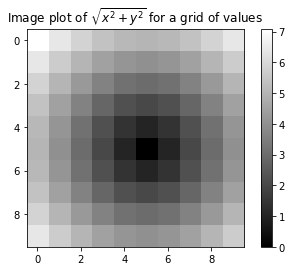

In [92]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [93]:
plt.draw()

<Figure size 432x288 with 0 Axes>

In [94]:
plt.close('all')

### 배열 연산으로 조건절 표현하기

```np.where```함수는 x if 조건 else y 같은 삼항식의 벡터화된 버전

In [95]:

import numpy as np
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [96]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result  #c의 값이 true이면 x, false이면 y를 가져옴

[1.1, 2.2, 1.3, 1.4, 2.5]

cond 값이 
>True 일때는 xarr의 값을 취하고   
>False 일때는 yarr의 값을 취하기

==> 문제점 다차원에서 사용불가, 큰 배열 사용 불가

In [97]:
#np.where(조건, 참일때의 값, 거짓일때의 값)
result = np.where(cond, xarr, yarr)
result  #위의 결과와 같음!! cond가 참이면 x, 거짓이면 y

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [98]:
arr = np.random.randn(4, 4)  #4행 4열로 가져와라
print(arr)
print(arr > 0)
np.where(arr > 0, 2, -2)  #조건이 참이면 2, 거짓이면 -2로 출력

[[ 2.46765106 -1.50832149  0.62060066 -1.04513254]
 [-0.79800882  1.98508459  1.74481415 -1.85618548]
 [-0.2227737  -0.06584785 -2.13171211 -0.04883051]
 [ 0.39334122  0.21726515 -1.99439377  1.10770823]]
[[ True False  True False]
 [False  True  True False]
 [False False False False]
 [ True  True False  True]]


array([[ 2, -2,  2, -2],
       [-2,  2,  2, -2],
       [-2, -2, -2, -2],
       [ 2,  2, -2,  2]])

```np.where```를 사용하여 스칼라 값과 배열을 조합   
   
아래 예는 arr 모든 양수를 2로 변경

In [99]:
np.where(arr > 0, 2, arr) # 양수인 경우에만 2를 대입

array([[ 2.        , -1.50832149,  2.        , -1.04513254],
       [-0.79800882,  2.        ,  2.        , -1.85618548],
       [-0.2227737 , -0.06584785, -2.13171211, -0.04883051],
       [ 2.        ,  2.        , -1.99439377,  2.        ]])

### 수학 메서드와 통계 메서드

In [100]:
arr = np.random.randn(5, 4)
print(arr)
print(arr.mean())  #행렬의 평균
print(np.mean(arr))  #행렬의 평균
arr.sum()  # 행렬의 모든 값을 더하기

[[ 0.24454398 -0.06191203 -0.75389296  0.71195902]
 [ 0.91826915 -0.48209314  0.08958761  0.82699862]
 [-1.95451212  0.11747566 -1.90745689 -0.92290926]
 [ 0.46975143 -0.14436676 -0.40013835 -0.29598385]
 [ 0.84820861  0.70683045 -0.78726893  0.29294072]]
-0.124198451631778
-0.124198451631778


-2.48396903263556

```mean```과 ```sum```같은 함수는 선택적으로 ```axis```인자를 받아서 해당 axis에 대한 통계를 계산 하고 한차수 낮은 배열을 반환
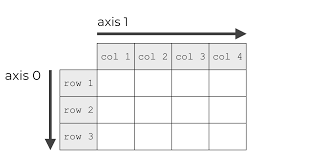

In [101]:
arr = np.random.randn(5, 4)
arr

array([[-0.47080725,  2.40432561, -0.73935674, -0.31282876],
       [-0.34888192, -0.43902624,  0.14110417,  0.27304932],
       [-1.61857075, -0.57311336, -1.32044755,  1.23620533],
       [ 2.46532508,  1.38323223,  0.34623312,  1.02251611],
       [ 0.16681027,  1.65671662,  0.66788961, -0.22994664]])

In [102]:
#axis = 0이면 행을 고정 => 열의 연산 결과
#axis = 1이면 열을 고정 => 행의 연산 결과
print(arr.mean(axis=1))  #행의 평균을 구하기
arr.sum(axis=0)  #열의 합을 구하기

[ 0.22033321 -0.09343867 -0.56898158  1.30432663  0.56536746]


array([ 0.19387543,  4.43213486, -0.90457739,  1.98899535])

In [103]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()  #합의 누적 결과를 보여줌 (1, 1+2, 1+2+3, 1+2+3+4 ...)

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [104]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])  # 왜 이거는 안하고 넘어감?
print(arr)
print(arr.cumsum(axis=0))  #행을 고정, 열의 합들을 누적으로 출력 ex. 0 0+3 0+3+6 => = 0 3 9(0열 결과)
arr.cumprod(axis=1)  #열을 고정, 행의 곱들을 누적으로 출력 ex. 3 3*4 3*4*5 => 3 12 60

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]


array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

### 배열의 불리언을 위한 메서드

메서드의 불리언 값을 1또는 0으로 강제 할 수 있어서 ```sum```메서드를 실행하는 불리언 배열의 True 갯수 셀 수 있음

In [105]:
arr = np.random.randn(10)
print(arr)
(arr > 0).sum() # Number of positive values  #참인 항목의 개수!!!!!

[-1.12955119 -0.6399626   0.31383052 -1.22583598 -0.22179314  1.33992631
  0.02930971  1.98538575  1.4471656  -0.28762941]


5

```any``` 하나 이상의 값이 True 인지 확인 <br>
```all``` 모든 원소값이 True 인지 확인

In [106]:
bools = np.array([False, False, True, False])
print(bools.any())  #하나라도 true이면 true
bools.all()  #모두가 true여야 true

True


False

### 정렬

리스트의 ```sort```처럼 Numpy 배열 역시 sort 이용해 정렬가능

In [107]:
arr = np.random.randn(6)
print(arr)
arr.sort()  #오름차순으로 정렬
arr  

[-1.35931057 -0.04804133 -0.48078734  0.37775309  1.61440797 -1.12310404]


array([-1.35931057, -1.12310404, -0.48078734, -0.04804133,  0.37775309,
        1.61440797])

In [108]:
arr = np.random.randn(5, 3)
print(arr)  #기본 배열
arr.sort(0)  #열별로 오름차순 정렬 = 행을 고정하여 열만 보겠다
print(arr)
arr.sort(1)  #행별로 오름차순 정렬 = 열을 고정하여 행만 보겠다
arr

[[-0.38872795  0.33234995  1.13497317]
 [ 0.51071441  0.41429764  1.34454942]
 [ 0.49351532 -0.23700418  0.05728515]
 [-0.70707145  0.54666484  0.94250041]
 [-2.97959677  1.21814885 -0.05652072]]
[[-2.97959677 -0.23700418 -0.05652072]
 [-0.70707145  0.33234995  0.05728515]
 [-0.38872795  0.41429764  0.94250041]
 [ 0.49351532  0.54666484  1.13497317]
 [ 0.51071441  1.21814885  1.34454942]]


array([[-2.97959677, -0.23700418, -0.05652072],
       [-0.70707145,  0.05728515,  0.33234995],
       [-0.38872795,  0.41429764,  0.94250041],
       [ 0.49351532,  0.54666484,  1.13497317],
       [ 0.51071441,  1.21814885,  1.34454942]])

In [109]:
#1000개 만들어서 뭘 어쨌다는 말?
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.5 * len(large_arr))] # 5% quantile

-0.023041188373248082

### 집합관련함수

```np.unique```함수는 중복된 원소를 제거하고 남은 원소를 정렬된 형태로 반환

In [110]:
import numpy as np
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)  #중복된 값을 하나만 쓰게 해주는 함수


array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [111]:
np.array(set(names))  #set데이터타입을 넘파이로 바꾸고싶다면 np.array 안에 넣어주기

array({'Bob', 'Will', 'Joe'}, dtype=object)

In [112]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

파이썬의 ```set```을 이용해서도 가능 

In [113]:
sorted(set(names))

['Bob', 'Joe', 'Will']

```np.in1d``` 함수는 두개의 배열을 인자로 받아서 첫번째 배열의 원소가 두번째 배열의 원소를 포함하는지를 나타내는 불리언 배열로 반환

In [114]:
import numpy as np
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])  #value에 있는 값이 뒤의 값 중 하나인가? 참/거짓

array([ True, False, False,  True,  True, False,  True])

## 배열의 파일 입출력

numpy는 디스크나 텍스트나 바이너리 형식의 데이터를 불러오거나 저장 가능
표형식의 데이터는 pandas에서 처리하는 것을 선호하기 때문에 다음장에
     
```np.save``` 와 ```np.load```는 배열 데이터를 효과적으로 디스크에 저장하고 불러오기 위한 함수    
확장자 ```npy```로 끝나지 않으면 자동적으로 확장자 추가

In [115]:
arr = np.arange(10)
arr2 = np.array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])
np.save('some_array', arr)  # 이런 이름으로 매트릭스 저장해두기

In [116]:
np.load('some_array.npy')  #이런 이름의 매트릭스 로드

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

```np.savez```함수를 이용하면 여러개의 배열을 압축된 형식으로 저장

In [117]:
np.savez('array_archive.npz', a=arr, b=arr2)

In [118]:
arch = np.load('array_archive.npz')
print(arch['b'])  #'b'에 저장된 행렬을 가져오겠다
arch['a']

[9 8 7 6 5 4 3 2 1 0]


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

압축이 잘되는 데이터라면 ```np.savez_compressed```사용

In [119]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

In [120]:
!rm some_array.npy  #!의 의미는 터미널에서 해당 명령어를 실행하겠다는 의미!
!rm array_archive.npz
!rm arrays_compressed.npz

'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [121]:
!pip3 install numpy

## 선형대수

```dot```을 이용하여 행렬곱
```python
x.dot(y)
```
코드는 
```python
np.dot(x,y)
```
와 같다

In [122]:
x = np.array([[1., 2., 3.], [4., 5., 6.]]) #2x3
y = np.array([[6., 23.], [-1, 7], [8, 9]]) #3x2
print(x)
print(y)
print(x.dot(y))  #2x2  # x 행렬곱 y
y.dot(x)  #3x3   # y 행렬곱 x

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 6. 23.]
 [-1.  7.]
 [ 8.  9.]]
[[ 28.  64.]
 [ 67. 181.]]


array([[ 98., 127., 156.],
       [ 27.,  33.,  39.],
       [ 44.,  61.,  78.]])

In [123]:
np.dot(x, y)  # x 행렬곱 y

array([[ 28.,  64.],
       [ 67., 181.]])

In [124]:
# 이건 또 왜 안하고 그냥 넘어가냐
np.dot(x, np.ones(3))  #이건 왜 안함????
#2x3 @ 3x1 = 2x1 #np.ones가 모든 값을 1로 3행의 행렬을 만드는거니까!!!!

array([ 6., 15.])

Python3.5 이상부터 @ 기호는 행렬 곱셈

In [125]:
#이것도 안하고 그낭 넘어감.. 근데 그냥 @ 기호도 행렬곱이라는 말인듯
x @ np.ones(3)

array([ 6., 15.])

```numpy.linag```는 행렬의 분할과 역행렬, 행렬식과 같은 것들을 포함

A=QR

Q = 유니러티 행렬

R = 상삼각 행렬

In [126]:
# 여기 다시 한 번 봐주세요... 뭐야...
import numpy as np
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)  #원래의 행렬의 전치 행렬과 원래의 행렬을 행렬곱한 결과
print('기본 보기')
print(mat)
print(); print('역행렬')
print(inv(mat))  #역행렬 구하기(inverse)
print(); print('역행렬과 다시 내적한 결과')
print(mat.dot(inv(mat)))
q, r = qr(mat)  #유니러티, 상삼각 행렬 구하는 함수
print(); print('상삼각 행렬')
print(r)
q

기본 보기
[[ 3.81457542  0.42009529 -0.4002692   0.51057268 -0.57166002]
 [ 0.42009529  7.12050478  1.66240896  4.11578563 -6.55968035]
 [-0.4002692   1.66240896  2.72806593  2.88464698 -4.49114059]
 [ 0.51057268  4.11578563  2.88464698  6.78096591 -9.00929119]
 [-0.57166002 -6.55968035 -4.49114059 -9.00929119 13.44287704]]

역행렬
[[ 0.28592779  0.0067035   0.13823183 -0.02320938  0.04605747]
 [ 0.0067035   0.28277355  0.13826076  0.12889273  0.27084357]
 [ 0.13823183  0.13826076  0.96018024  0.19036142  0.52171078]
 [-0.02320938  0.12889273  0.19036142  1.43058001  1.08426782]
 [ 0.04605747  0.27084357  0.52171078  1.08426782  1.10947511]]

역행렬과 다시 내적한 결과
[[ 1.00000000e+00  3.49609606e-17  8.03219361e-17  2.02350775e-17
   6.07448129e-18]
 [ 2.49782707e-17  1.00000000e+00 -2.67604558e-17  5.18416257e-16
   2.26276274e-16]
 [ 3.91319822e-17  2.16299630e-16  1.00000000e+00 -2.89996275e-16
   6.27125437e-16]
 [-4.01124618e-17  4.97738207e-16  1.32149270e-17  1.00000000e+00
   1.81423387e-15]
 

array([[-0.96968041,  0.19204912, -0.03912896,  0.14330308,  0.02775235],
       [-0.10678991, -0.66137109,  0.65420113,  0.31075883,  0.16319931],
       [ 0.10175004, -0.18479384, -0.58812465,  0.71469175,  0.31436168],
       [-0.12978963, -0.36595987, -0.2742555 , -0.58920665,  0.65333565],
       [ 0.14531828,  0.59802176,  0.38650113,  0.15793794,  0.66852454]])

## 난수생성

```numpy.random``` 모듈은 파이썬 내장 random 함수를 보강 하여 다양한 종류의 확률분포로 부터 표본값을 생성 하는데 주로 사용
   
아래 코드는 표준정규분포로 부터 4 x 4 크기의 표본 생성

In [127]:
samples = np.random.normal(size=(4, 4))
samples

array([[-0.10611793,  1.56992751,  0.07852882,  0.03891702],
       [-1.43163409, -0.02387055,  1.0343507 ,  0.13291787],
       [ 0.42019074,  0.35044301,  2.4480048 , -0.78377533],
       [ 0.76524731,  0.70596004,  0.72298683,  1.75847292]])

In [128]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

2.05 s ± 341 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
67.6 ms ± 14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


난수 생성기의 시드값에 따라 정해진 난수를 알고리즘으로 생성

In [129]:
np.random.seed(1234)  #seed를 설정했기 때문에 실행할 때마다 같은 값이 출력됨

![](/Users/Jaehee/Documents/pydata-book/img/table4_7.png)

In [130]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])